# 기본

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install chefboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from chefboost import Chefboost as chef
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [3]:
df_priv = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/Raw_data/x_person.csv')
df_corp = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/Raw_data/x_company.csv')
df_final_priv = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/Raw_data/y_final_priv.csv')
df_final_corp = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/Raw_data/y_final_corp.csv')

In [ ]:
df_final_corp

,JOIN_SN,is_applied
0,1571447,1
1,109435,1
2,1302487,1
3,1209039,1
4,989988,1
...,...,...
1834,1108492,1
1835,1420612,1
1836,821322,1
1837,151677,1


In [5]:
df_priv = pd.merge(df_priv, df_final_priv, how='left', left_on='JOIN_SN', right_on='JOIN_SN')
df_corp = pd.merge(df_corp, df_final_corp, how='left', left_on='JOIN_SN', right_on='JOIN_SN')

df_priv.fillna(0,inplace=True)
df_priv = df_priv.drop_duplicates()

df_corp.fillna(0,inplace=True)
df_corp = df_corp.drop_duplicates()

df_priv = df_priv.drop(columns = ['JOIN_SN'], axis=1)
df_corp = df_corp.drop(columns = ['JOIN_SN'], axis=1)

In [ ]:
df_corp

,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,BIZ_TYP_CD_8000,BIZ_TYP_CD_9000,...,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT,is_applied
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,11320.000000,4464.000000,28810.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,5.0,0.0,26840.000000,4004.000000,127980.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,7.0,0.0,7.0,0.0,9958.823529,3560.294118,7210.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,29965.116279,12581.395349,47020.0,31620.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,5.0,0.0,14733.944954,5088.073394,27850.0,0.0,0.0,0.0
3406,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,4.0,1.0,9756.470588,2295.294118,60810.0,2740.0,0.0,1.0
3407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,3.0,0.0,30000.000000,13000.000000,43520.0,0.0,0.0,0.0
3408,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0


In [ ]:
config1 = {'algorithm' : 'ID3'}
config2 = {'algorithm' : 'CART'}
config3 = {'algorithm' : 'CHAID'}
config4 = {'algorithm' : 'C4.5'}

In [ ]:
df_O = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/sampling_data/Under_sampling_df.csv')

In [ ]:
df_O

,AGE,GENDER,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,...,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT,is_applied
0,57,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,207000000.0,0.0
1,52,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,30000.000000,30000.000000,245120.0,0.0,200000000.0,0.0
2,79,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,30000.000000,17000.000000,48740.0,0.0,107630000.0,0.0
3,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.000000,0.000000,420.0,0.0,92303200.0,0.0
4,56,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,11376.000000,3656.000000,11950.0,0.0,47000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37731,50,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,14662.337662,4890.909091,35820.0,0.0,0.0,1.0
37732,40,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
37733,56,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37734,12,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


# 변수 추출

In [ ]:
df.corr(method = 'pearson')

,AGE,GENDER,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,...,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT,is_applied
AGE,1.000000,0.009507,-0.123509,0.034518,0.037432,0.022776,0.067052,0.040101,0.063310,0.023153,...,0.257579,-0.058152,0.244785,0.069847,0.216786,0.194178,0.112890,0.043722,0.018729,0.200485
GENDER,0.009507,1.000000,0.025616,-0.005092,-0.019527,-0.006440,-0.027633,-0.001848,-0.005357,-0.006812,...,-0.006293,-0.005923,-0.004498,-0.018514,-0.013629,-0.016453,-0.019238,0.009894,-0.013250,-0.052031
BIZ_TYP_CD_0000,-0.123509,0.025616,1.000000,-0.179852,-0.208172,-0.195719,-0.554255,-0.383513,-0.361058,-0.214967,...,-0.257514,0.003408,-0.194347,-0.465969,-0.191728,-0.177331,-0.230843,-0.035179,-0.056873,-0.257995
BIZ_TYP_CD_1000,0.034518,-0.005092,-0.179852,1.000000,0.004643,0.019978,0.009222,0.027860,0.007051,0.005340,...,0.034440,-0.001795,0.020335,0.100083,0.017197,0.013214,0.020633,0.006062,0.008069,0.041362
BIZ_TYP_CD_2000,0.037432,-0.019527,-0.208172,0.004643,1.000000,0.026443,0.000441,0.003022,0.015795,-0.003017,...,0.038731,-0.007920,0.022300,0.111163,0.029098,0.020738,0.023976,0.000069,0.049370,0.046789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_CA_LMT,0.194178,-0.016453,-0.177331,0.013214,0.020738,0.035404,0.086013,0.069134,0.091733,0.053068,...,0.758888,0.019121,0.754519,0.147264,0.933459,1.000000,0.711846,0.168237,0.037794,0.392255
CD_USG_AMT,0.112890,-0.019238,-0.230843,0.020633,0.023976,0.040825,0.136282,0.095155,0.076205,0.081973,...,0.631597,0.039565,0.620050,0.198291,0.709622,0.711846,1.000000,0.116813,0.044888,0.366630
CD_CA_AMT,0.043722,0.009894,-0.035179,0.006062,0.000069,-0.002322,0.022910,0.010546,0.006883,0.021386,...,0.095074,0.011052,0.096453,0.012955,0.142704,0.168237,0.116813,1.000000,-0.000500,0.119594
GRNT_AMT,0.018729,-0.013250,-0.056873,0.008069,0.049370,0.015516,0.102947,0.005408,0.086323,0.006418,...,0.023316,0.008957,0.022277,0.018267,0.031598,0.037794,0.044888,-0.000500,1.000000,0.025102


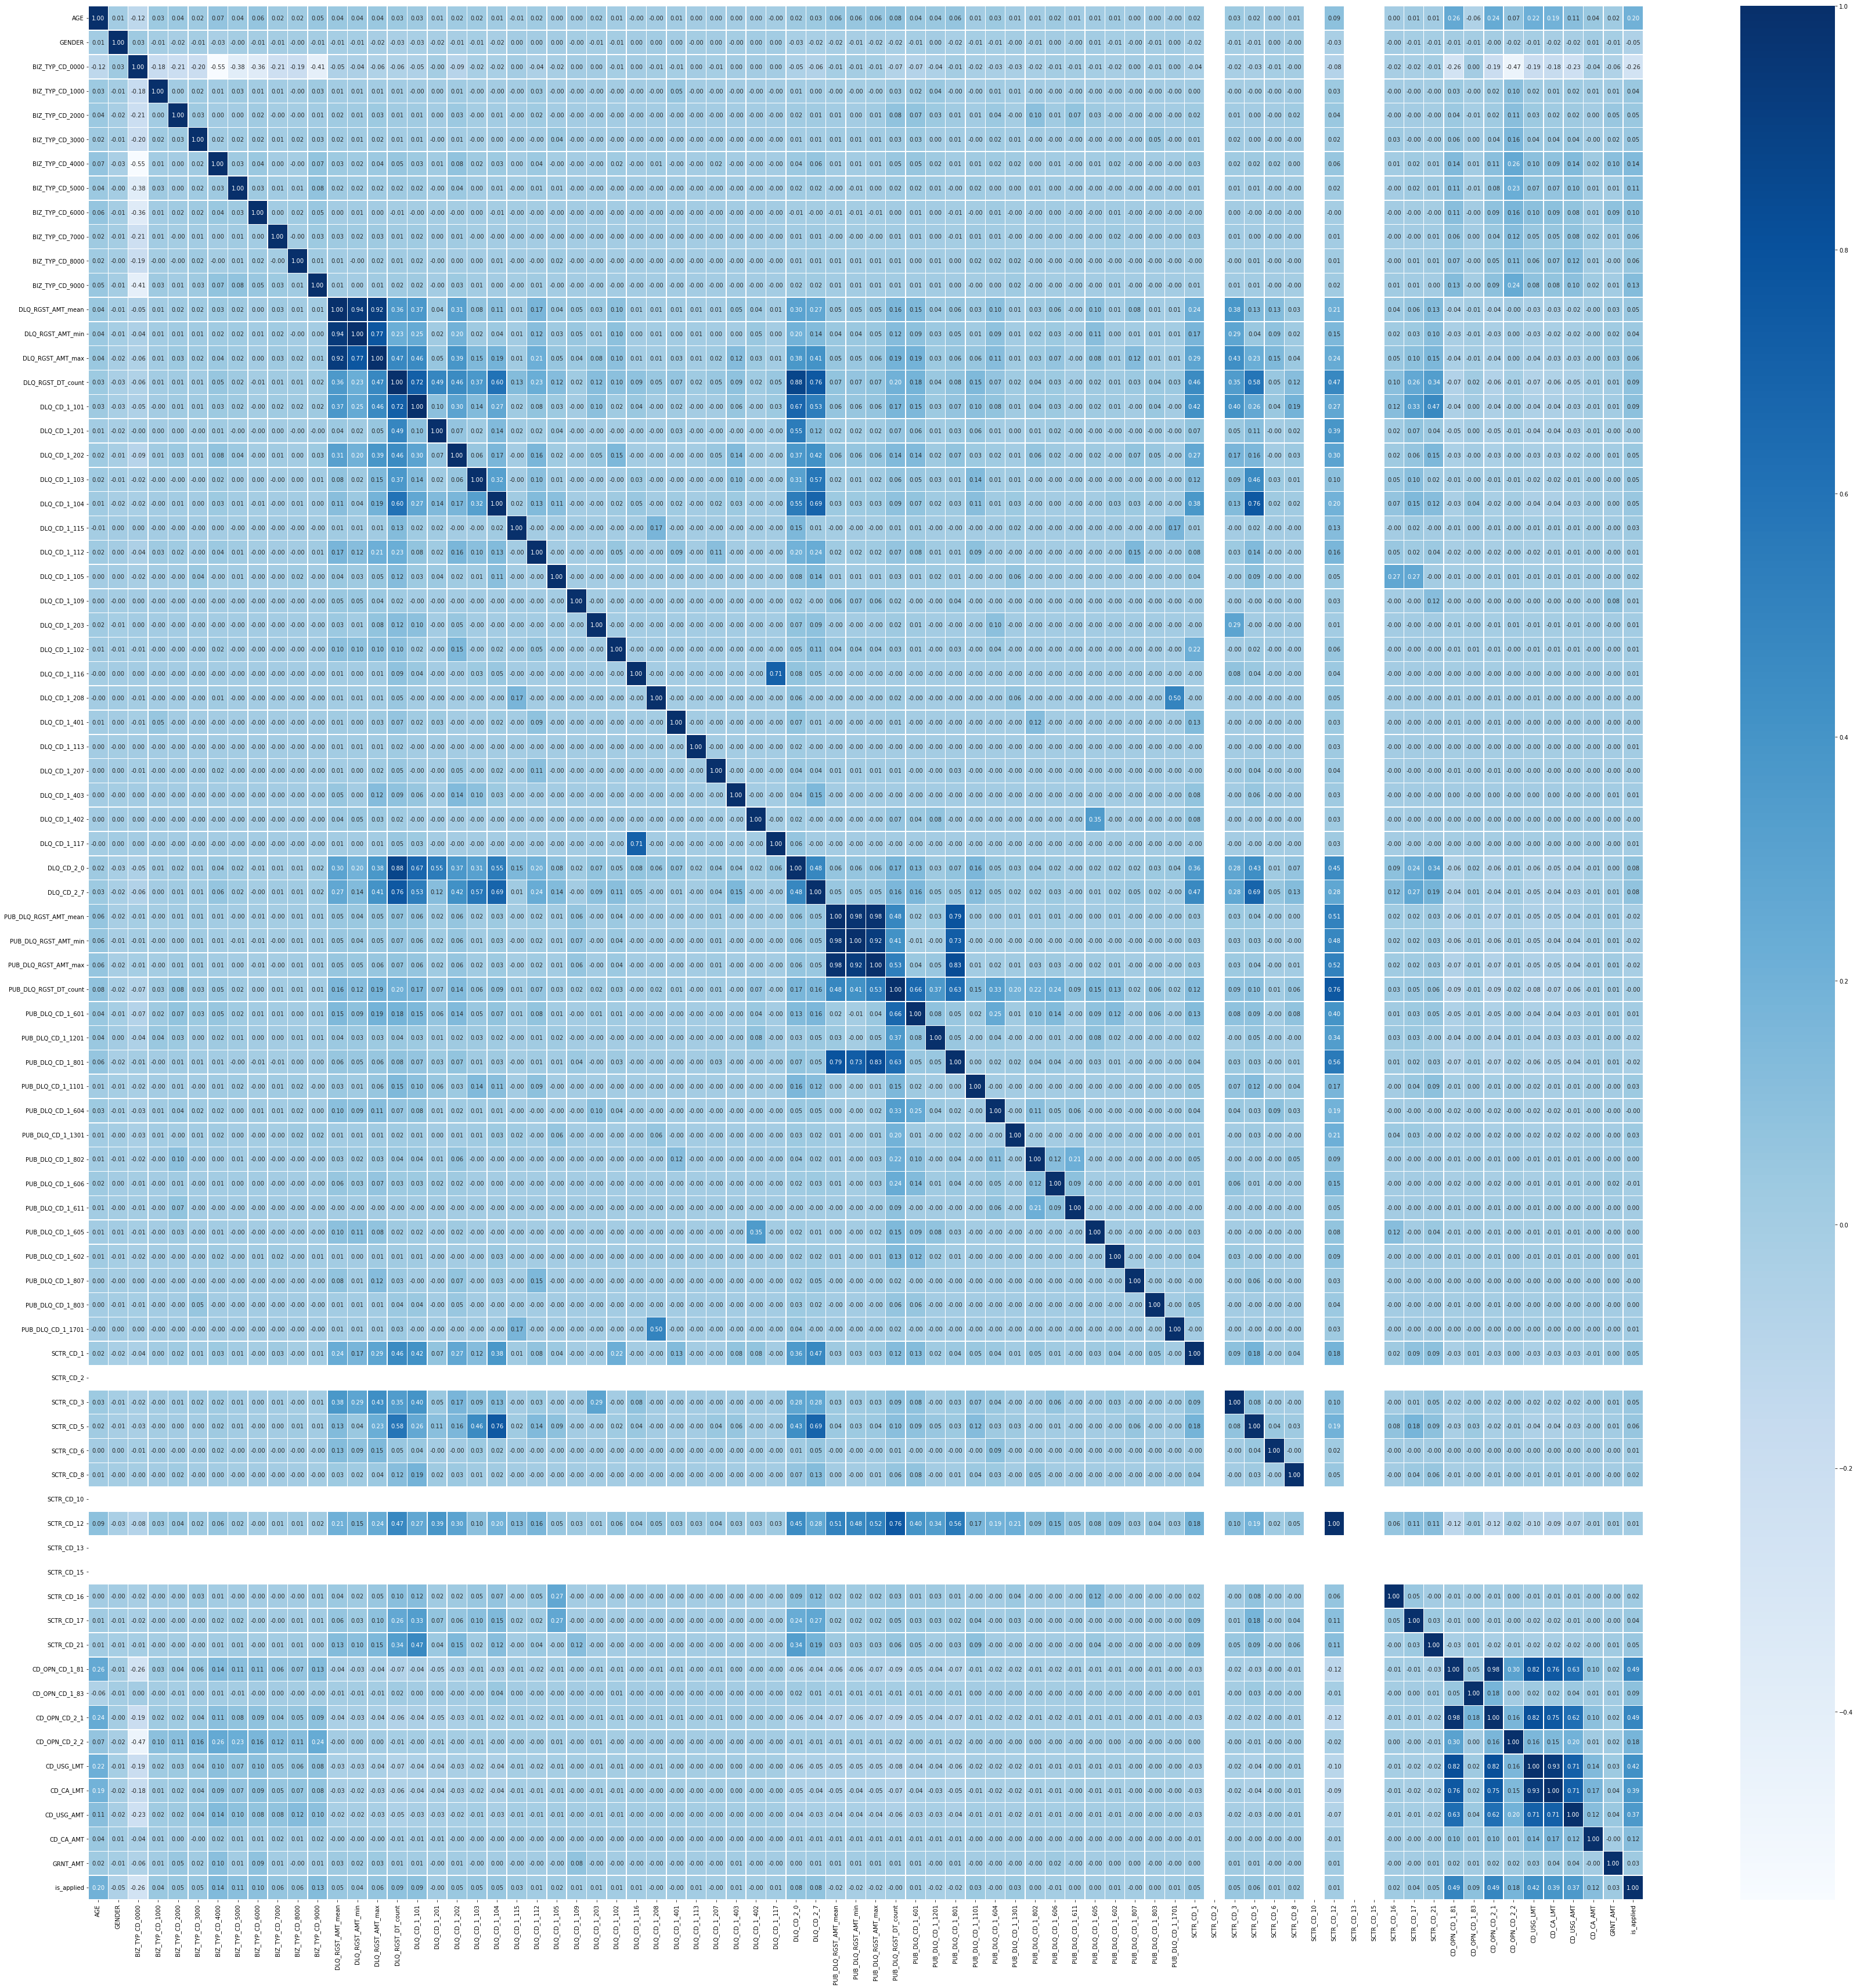

In [ ]:
fig, ax = plt.subplots(figsize=(60,60))
sns.heatmap(df.corr(method = 'pearson'),linewidth = 0.5, annot = True, fmt = '.2f', cmap = 'Blues', ax = ax)

 0.8≤r 일 때, 강한 상관이 있다. \\
 0.6≤r<0.8 일 때, 상관이 있다. \\
 0.4≤r<0.6 일 때, 약한 상관이 있다.

# Over Sampling priv

In [6]:
# feature, label 분리
X_p = df_priv.drop('is_applied', axis = 1)
Y_p = df_priv['is_applied']

In [7]:
# 그냥 원본 데이터 분리
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_p, Y_p, test_size = 0.2, random_state = 42)

In [8]:
y_train_p.value_counts()

0.0    25301
1.0    13327
Name: is_applied, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3, random_state = 42)

O_x_train_p, O_y_train_p = oversampling_instance.fit_resample(x_train_p, y_train_p) # sampling_strategy로 비율 변경 가능
O_x_train_p = pd.DataFrame(O_x_train_p, columns = X_p.columns)
O_y_train_p = pd.Series(O_y_train_p)

In [ ]:
O_y_train_p.value_counts()

0.0    25301
1.0    25301
Name: is_applied, dtype: int64

In [ ]:
O_x_train_p['is_applied'] = O_y_train_p

In [ ]:
O_x_train_p.drop('is_applied', axis = 1, inplace = True)

In [ ]:
O_x_train_p.to_csv('/content/drive/Shareddrives/데캡디/Result/sampling_data/Over_sampling_20.csv', index = False)

# Over Sampling corp

In [ ]:
# feature, label 분리
X_c = df_corp.drop('is_applied', axis = 1)
Y_c = df_corp['is_applied']

In [ ]:
Y_c

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
3405    0.0
3406    1.0
3407    0.0
3408    1.0
3409    1.0
Name: is_applied, Length: 3410, dtype: float64

In [ ]:
# 그냥 원본 데이터 분리
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c, test_size = 0.2, random_state = 42)

In [ ]:
y_train_c.value_counts()

1.0    1467
0.0    1261
Name: is_applied, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3, random_state = 42)

O_x_train_c, O_y_train_c = oversampling_instance.fit_resample(x_train_c, y_train_c) # sampling_strategy로 비율 변경 가능
O_x_train_c = pd.DataFrame(O_x_train_c, columns = X_c.columns)
O_y_train_c = pd.Series(O_y_train_c)

In [ ]:
O_y_train_c.value_counts()

1.0    1467
0.0    1467
Name: is_applied, dtype: int64

In [ ]:
O_x_train_c['is_applied'] = O_y_train_c

In [ ]:
O_x_train_c.drop('is_applied', axis = 1, inplace = True)

In [ ]:
O_x_train_c.to_csv('/content/drive/Shareddrives/데캡디/Result/sampling_data/Over_sampling_20.csv', index = False)

# XGboost priv

In [ ]:
xgb_p = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.8)


xgb_p.fit(O_x_train_p, O_y_train_p)

XGBClassifier(colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=10,
              n_estimators=500, nthread=-1, seed=2019, silent=True,
              subsample=0.8)

In [ ]:
y_pred_xgb = xgb_p.predict(x_test_p)

In [ ]:
print(classification_report(y_test_p, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      6445
         1.0       0.61      0.71      0.66      3212

    accuracy                           0.75      9657
   macro avg       0.73      0.74      0.73      9657
weighted avg       0.77      0.75      0.76      9657



In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(xgb_p, random_state = 42).fit(x_test_p, y_test_p)

In [ ]:
eli5.show_weights(perm, feature_names = x_test_p.columns.tolist())

Weight,Feature
0.0285 ± 0.0032,CD_USG_AMT
0.0236 ± 0.0026,CD_CA_AMT
0.0187 ± 0.0019,AGE
0.0178 ± 0.0066,CD_OPN_CD_2_1
0.0071 ± 0.0035,GENDER
0.0049 ± 0.0029,CD_CA_LMT
0.0033 ± 0.0006,DLQ_CD_1_101
0.0033 ± 0.0049,CD_USG_LMT
0.0012 ± 0.0006,DLQ_RGST_AMT_max
0.0010 ± 0.0003,CD_OPN_CD_1_83


In [ ]:
temp = eli5.explain_weights_df(perm)
temp.head()

,feature,weight,std
0,x64,0.028456,0.001595
1,x65,0.023589,0.001279
2,x0,0.018681,0.000930
3,x60,0.017790,0.003277
4,x1,0.007062,0.001759


In [ ]:
importance_cols_p = temp[temp['weight']>0]['feature'].map(lambda x:int(x.replace('x', ''))).values
importance_cols_p = O_x_train_p.columns[importance_cols_p].values
#importance_cols_p = importance_cols_p[:20]


In [ ]:
importance_cols_p

array(['CD_USG_AMT', 'CD_CA_AMT', 'AGE', 'CD_OPN_CD_2_1', 'GENDER',
       'CD_CA_LMT', 'DLQ_CD_1_101', 'CD_USG_LMT', 'DLQ_RGST_AMT_max',
       'CD_OPN_CD_1_83', 'SCTR_CD_12', 'DLQ_CD_1_103', 'DLQ_CD_1_115',
       'CD_OPN_CD_2_2', 'DLQ_RGST_AMT_min', 'PUB_DLQ_RGST_AMT_min',
       'PUB_DLQ_CD_1_1301', 'PUB_DLQ_CD_1_1101', 'GRNT_AMT',
       'DLQ_CD_1_104', 'PUB_DLQ_RGST_DT_count', 'PUB_DLQ_CD_1_801',
       'DLQ_CD_1_202', 'DLQ_CD_2_0', 'SCTR_CD_17', 'SCTR_CD_21',
       'DLQ_CD_1_105', 'PUB_DLQ_CD_1_604'], dtype=object)

In [ ]:
O_x_train_selected_p = O_x_train_p[importance_cols_p]
x_test_selected_p = x_test_p[importance_cols_p]

O_x_train_selected_p.shape, x_test_selected_p.shape

((50602, 28), (9657, 28))

In [ ]:
O_x_train_selected_p

,CD_USG_AMT,CD_CA_AMT,AGE,CD_OPN_CD_2_1,GENDER,CD_CA_LMT,DLQ_CD_1_101,CD_USG_LMT,DLQ_RGST_AMT_max,CD_OPN_CD_1_83,...,GRNT_AMT,DLQ_CD_1_104,PUB_DLQ_RGST_DT_count,PUB_DLQ_CD_1_801,DLQ_CD_1_202,DLQ_CD_2_0,SCTR_CD_17,SCTR_CD_21,DLQ_CD_1_105,PUB_DLQ_CD_1_604
0,0.000000,0.000000,79,0.000000,1,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,18,0.000000,2,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,21,0.000000,1,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2920.000000,0.000000,42,3.000000,1,1633.333333,0.0,4566.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,37,2.000000,1,0.000000,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50597,0.000000,0.000000,25,0.000000,1,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50598,44159.936996,0.000000,42,4.000000,1,7893.745659,0.0,25803.385521,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50599,30722.103869,0.000000,56,3.464208,2,4568.894043,0.0,21940.428941,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50600,38901.969017,0.000000,39,3.665433,1,4216.493524,0.0,12222.923652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
O_x_train_selected_p.columns

Index(['CD_USG_AMT', 'CD_CA_AMT', 'AGE', 'CD_OPN_CD_2_1', 'GENDER',
       'CD_CA_LMT', 'DLQ_CD_1_101', 'CD_USG_LMT', 'DLQ_RGST_AMT_max',
       'CD_OPN_CD_1_83', 'SCTR_CD_12', 'DLQ_CD_1_103', 'DLQ_CD_1_115',
       'CD_OPN_CD_2_2', 'DLQ_RGST_AMT_min', 'PUB_DLQ_RGST_AMT_min',
       'PUB_DLQ_CD_1_1301', 'PUB_DLQ_CD_1_1101', 'GRNT_AMT', 'DLQ_CD_1_104',
       'PUB_DLQ_RGST_DT_count', 'PUB_DLQ_CD_1_801', 'DLQ_CD_1_202',
       'DLQ_CD_2_0', 'SCTR_CD_17', 'SCTR_CD_21', 'DLQ_CD_1_105',
       'PUB_DLQ_CD_1_604'],
      dtype='object')

In [ ]:
xgb_p = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.8)

xgb_p.fit(O_x_train_selected_p, O_y_train_p)

XGBClassifier(colsample_bytree=0.8, gamma=2, n_estimators=500, nthread=-1,
              seed=2019, silent=True, subsample=0.8)

In [ ]:
y_pred_xgb = xgb_p.predict(x_test_selected_p)

In [ ]:
print(classification_report(y_test_p, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      6445
         1.0       0.61      0.74      0.67      3212

    accuracy                           0.76      9657
   macro avg       0.73      0.75      0.74      9657
weighted avg       0.77      0.76      0.76      9657



#Grid priv

In [ ]:
xgb_param_grid={
    'n_estimators' : [100, 800],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,7,10],
    'gamma' : [0,1,2],
    'colsample_bytree' : [0.8,0.9],
}

In [ ]:
grid = XGBClassifier()

In [ ]:
xgb_grid=GridSearchCV(grid, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
xgb_grid.fit(O_x_train_selected_p, O_y_train_p) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1, 2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 800]},
             scoring='f1_macro', verbose=2)

In [ ]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 800}


In [ ]:
print(xgb_grid.best_score_)

0.7748623791349705


# XGboost corp

In [ ]:
xgb_c = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.8)


xgb_c.fit(O_x_train_c, O_y_train_c)

XGBClassifier(colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=10,
              n_estimators=500, nthread=-1, seed=2019, silent=True,
              subsample=0.8)

In [ ]:
y_pred_xgb = xgb_c.predict(x_test_c)

In [ ]:
print(classification_report(y_test_c, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70       317
         1.0       0.74      0.74      0.74       365

    accuracy                           0.72       682
   macro avg       0.72      0.72      0.72       682
weighted avg       0.72      0.72      0.72       682



In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(xgb_c, random_state = 42).fit(x_test_c, y_test_c)

In [ ]:
eli5.show_weights(perm, feature_names = x_test_c.columns.tolist())

Weight,Feature
0.1035 ± 0.0334,CD_OPN_CD_2_2
0.0604 ± 0.0219,CD_USG_LMT
0.0481 ± 0.0336,CD_USG_AMT
0.0164 ± 0.0115,BIZ_TYP_CD_0000
0.0161 ± 0.0041,BIZ_TYP_CD_6000
0.0155 ± 0.0066,DLQ_CD_1_202
0.0155 ± 0.0112,CD_CA_LMT
0.0123 ± 0.0071,CD_OPN_CD_2_1
0.0114 ± 0.0141,CD_OPN_CD_1_81
0.0088 ± 0.0072,BIZ_TYP_CD_5000


In [ ]:
temp = eli5.explain_weights_df(perm)
temp.head()

,feature,weight,std
0,x69,0.103519,0.016708
1,x70,0.060411,0.010949
2,x72,0.048094,0.016780
3,x0,0.016422,0.005747
4,x6,0.016129,0.002074


In [ ]:
importance_cols_c = temp[temp['weight']>0]['feature'].map(lambda x:int(x.replace('x', ''))).values
importance_cols_c = O_x_train_c.columns[importance_cols_c].values
#importance_cols_p = importance_cols_p[:20]


In [ ]:
importance_cols_c

array(['CD_OPN_CD_2_2', 'CD_USG_LMT', 'CD_USG_AMT', 'BIZ_TYP_CD_0000',
       'BIZ_TYP_CD_6000', 'CD_CA_LMT', 'DLQ_CD_1_202', 'CD_OPN_CD_2_1',
       'CD_OPN_CD_1_81', 'BIZ_TYP_CD_5000', 'BIZ_TYP_CD_9000',
       'DLQ_RGST_AMT_max', 'BIZ_TYP_CD_4000', 'PUB_DLQ_RGST_DT_count',
       'PUB_DLQ_RGST_AMT_mean', 'CD_OPN_CD_1_83', 'PUB_DLQ_RGST_AMT_min',
       'BIZ_TYP_CD_8000', 'PUB_DLQ_CD_1_1201', 'BIZ_TYP_CD_3000',
       'BIZ_TYP_CD_7000', 'DLQ_CD_2_0', 'CD_CA_AMT', 'DLQ_CD_1_112',
       'GRNT_AMT', 'PUB_DLQ_RGST_AMT_max', 'PUB_DLQ_CD_1_1101',
       'SCTR_CD_3', 'DLQ_RGST_AMT_min', 'PUB_DLQ_CD_1_601',
       'DLQ_CD_1_101', 'SCTR_CD_1'], dtype=object)

In [ ]:
O_x_train_selected_c = O_x_train_c[importance_cols_c]
x_test_selected_c = x_test_c[importance_cols_c]

O_x_train_selected_c.shape, x_test_selected_c.shape

((2934, 32), (682, 32))

In [ ]:
O_x_train_selected_c

,CD_OPN_CD_2_2,CD_USG_LMT,CD_USG_AMT,BIZ_TYP_CD_0000,BIZ_TYP_CD_6000,CD_CA_LMT,DLQ_CD_1_202,CD_OPN_CD_2_1,CD_OPN_CD_1_81,BIZ_TYP_CD_5000,...,CD_CA_AMT,DLQ_CD_1_112,GRNT_AMT,PUB_DLQ_RGST_AMT_max,PUB_DLQ_CD_1_1101,SCTR_CD_3,DLQ_RGST_AMT_min,PUB_DLQ_CD_1_601,DLQ_CD_1_101,SCTR_CD_1
0,0.000000,19227.848101,66670.000000,0.0,0.000000,7129.113924,0.0,4.000000,4.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,1.000000,18160.000000,132530.000000,0.0,0.000000,6524.000000,0.0,4.000000,5.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,1.000000,18500.000000,4020.000000,0.0,0.000000,6325.000000,0.0,2.000000,3.000000,0.000000,...,18700.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,1.000000,27800.000000,49890.000000,0.0,0.000000,6690.000000,0.0,4.000000,5.000000,0.000000,...,170.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,17795.454545,41400.000000,0.0,0.000000,6027.272727,0.0,4.000000,4.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,0.000000,20051.016799,19337.385389,0.0,0.037352,7020.224517,0.0,3.037352,3.037352,0.962648,...,44.821902,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2930,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2931,0.695974,14874.051708,78624.247996,0.0,0.000000,4186.941180,0.0,3.000000,3.695974,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2932,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.408953,0.0,0.0


In [ ]:
O_x_train_selected_c.columns

Index(['CD_OPN_CD_2_2', 'CD_USG_LMT', 'CD_USG_AMT', 'BIZ_TYP_CD_0000',
       'BIZ_TYP_CD_6000', 'CD_CA_LMT', 'DLQ_CD_1_202', 'CD_OPN_CD_2_1',
       'CD_OPN_CD_1_81', 'BIZ_TYP_CD_5000', 'BIZ_TYP_CD_9000',
       'DLQ_RGST_AMT_max', 'BIZ_TYP_CD_4000', 'PUB_DLQ_RGST_DT_count',
       'PUB_DLQ_RGST_AMT_mean', 'CD_OPN_CD_1_83', 'PUB_DLQ_RGST_AMT_min',
       'BIZ_TYP_CD_8000', 'PUB_DLQ_CD_1_1201', 'BIZ_TYP_CD_3000',
       'BIZ_TYP_CD_7000', 'DLQ_CD_2_0', 'CD_CA_AMT', 'DLQ_CD_1_112',
       'GRNT_AMT', 'PUB_DLQ_RGST_AMT_max', 'PUB_DLQ_CD_1_1101', 'SCTR_CD_3',
       'DLQ_RGST_AMT_min', 'PUB_DLQ_CD_1_601', 'DLQ_CD_1_101', 'SCTR_CD_1'],
      dtype='object')

In [ ]:
xgb_c = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.8) 

xgb_c.fit(O_x_train_selected_c, O_y_train_c)

XGBClassifier(colsample_bytree=0.8, gamma=2, n_estimators=500, nthread=-1,
              seed=2019, silent=True, subsample=0.8)

In [ ]:
y_pred_xgb = xgb_c.predict(x_test_selected_c)

In [ ]:
print(classification_report(y_test_c, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       317
         1.0       0.76      0.75      0.76       365

    accuracy                           0.74       682
   macro avg       0.74      0.74      0.74       682
weighted avg       0.74      0.74      0.74       682



#Grid corp

In [ ]:
xgb_param_grid={
    'n_estimators' : [100, 800],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,7,10],
    'gamma' : [0,1,2],
    'colsample_bytree' : [0.8,0.9],
}

In [ ]:
grid = XGBClassifier()

In [ ]:
xgb_grid=GridSearchCV(grid, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
xgb_grid.fit(O_x_train_selected_c, O_y_train_c) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1, 2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 800]},
             scoring='f1_macro', verbose=2)

In [ ]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 800}


In [ ]:
print(xgb_grid.best_score_)

0.7748623791349705


# LGBM


#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=42)
clf.fit(O_x_train, O_y_train)

RandomForestClassifier(max_depth=100, n_estimators=200, random_state=42)

In [ ]:
pred_clf = clf.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      7884
         1.0       0.64      0.70      0.67      4188

    accuracy                           0.76     12072
   macro avg       0.74      0.75      0.74     12072
weighted avg       0.77      0.76      0.76     12072



In [ ]:
print(confusion_matrix(y_test, pred_clf))

[[6383 1501]
 [1255 2933]]


####catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=True,
                           eval_metric = 'TotalF1')

# train the model
model.fit(x_train, y_train)
# make the prediction using the resulting model

0:	learn: 0.7437787	total: 25.8ms	remaining: 25.8ms
1:	learn: 0.7543622	total: 61.4ms	remaining: 0us


####CART, CHAID, C4.5

In [ ]:
k = 7
selector = SelectKBest(score_func = f_regression, k= k)
x_train_s = selector.fit_transform(O_x_train, O_y_train)
x_test_s = selector.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [ ]:
# 변수 개수 추출해서 진행
y_list = O_y_train.to_list()
x_train_sd = pd.DataFrame(x_train_s)
x_train_sd['is_applied'] = y_list

y_test_list = y_test.to_list()
x_test_sd = pd.DataFrame(x_test_s)
x_test_sd['is_applied'] = y_test_list


In [ ]:
i = 0
list1 = []
while i != k + 1:
    list1.append(str(i))
    i += 1
x_train_sd.columns = list1
x_test_sd.columns = list1

In [ ]:
x_train_sd.loc[x_train_sd['{0}'.format(k)] == 0.0, '{0}'.format(k)] = "No"
x_train_sd.loc[x_train_sd['{0}'.format(k)] == 1.0, '{0}'.format(k)] = "YES"
x_test_sd.loc[x_test_sd['{0}'.format(k)] == 0.0, '{0}'.format(k)] = "No"
x_test_sd.loc[x_test_sd['{0}'.format(k)] == 1.0, '{0}'.format(k)] = "YES"

In [ ]:
x_test_sd

,0,1,2,3,4,5,6,7
0,25.0,1.0,2.0,2.0,5066.666667,1311.111111,64920.0,YES
1,46.0,1.0,4.0,4.0,11907.446809,2900.000000,85980.0,No
2,27.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No
3,87.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No
4,39.0,1.0,6.0,6.0,29489.795918,12663.265306,79590.0,YES
...,...,...,...,...,...,...,...,...
12067,50.0,1.0,4.0,4.0,14662.337662,4890.909091,35820.0,YES
12068,40.0,1.0,0.0,0.0,0.000000,0.000000,0.0,YES
12069,56.0,1.0,1.0,1.0,0.000000,0.000000,0.0,No
12070,12.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No


In [ ]:
x_test_sd.rename(columns = {'{0}'.format(k) : 'Decision'}, inplace = True)

In [ ]:
x_test_sd

,0,1,2,3,4,5,6,Decision
0,25.0,1.0,2.0,2.0,5066.666667,1311.111111,64920.0,YES
1,46.0,1.0,4.0,4.0,11907.446809,2900.000000,85980.0,No
2,27.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No
3,87.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No
4,39.0,1.0,6.0,6.0,29489.795918,12663.265306,79590.0,YES
...,...,...,...,...,...,...,...,...
12067,50.0,1.0,4.0,4.0,14662.337662,4890.909091,35820.0,YES
12068,40.0,1.0,0.0,0.0,0.000000,0.000000,0.0,YES
12069,56.0,1.0,1.0,1.0,0.000000,0.000000,0.0,No
12070,12.0,1.0,0.0,0.0,0.000000,0.000000,0.0,No


In [ ]:
model1 = chef.fit(x_train_sd, config = config2, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  18.37648367881775  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  76.3932252683803 % on  46762  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[15932, 3590], [7449, 19791]]
Precision:  81.6105 %, Recall:  68.1408 %, F1:  74.2699 %


In [ ]:
chef.evaluate(model1, x_test_sd)

-------------------------
Evaluate  test set
-------------------------
Accuracy:  73.57521537442014 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[3515, 2517], [673, 5367]]
Precision:  58.2725 %, Recall:  83.9303 %, F1:  68.7867 %


In [ ]:
model2 = chef.fit(x_train_sd, config = config3, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  23.346622467041016  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  76.34404003250502 % on  46762  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[15936, 3617], [7445, 19764]]
Precision:  81.5016 %, Recall:  68.1579 %, F1:  74.2349 %


In [ ]:
chef.evaluate(model2, x_test_sd)

['0', '1', '2', '3', '4', '5', '6', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  73.48409542743539 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[3507, 2520], [681, 5364]]
Precision:  58.1882 %, Recall:  83.7393 %, F1:  68.6638 %


In [ ]:
model3 = chef.fit(x_train_sd, config = config4, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  11.661022424697876  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  75.98263547324751 % on  46762  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[14998, 2848], [8383, 20533]]
Precision:  84.0412 %, Recall:  64.1461 %, F1:  72.7581 %


In [ ]:
chef.evaluate(model3, x_test_sd)

['0', '1', '2', '3', '4', '5', '6', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  72.13386348575216 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[3653, 2829], [535, 5055]]
Precision:  56.3561 %, Recall:  87.2254 %, F1:  68.4724 %
